Grupos de variáveis:
- Dados do participante
- dados da escola
- dados do local e aplicação de prova
- dados da prova objetiva
- dados da redação
- dados do questionário socioeconômico

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.set_option('display.max_columns', 100)
df = pd.read_csv('dados_enem_2021_BA.csv')

Inspeção dos dados:

In [3]:
# df.head() #Mostra as 5 primeiras linhas (começo da tabela)
# df.tail() #Mostra as 5 últimas linhas (final da tabela)
df.shape

(266194, 51)

In [ ]:
df.info() #Mostra as colunas, tipos de dados e quantidade que está preenchida

In [ ]:
df.nunique().sort_values()
#Há colunas constantes -> NU_ANO ; SG_UF_PROVA ; CO_UF_PROVA

In [7]:
df.select_dtypes(include = object).columns.tolist()


['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [10]:
num_cols = df.select_dtypes(include = [int , float]).columns.to_list()
cat_cols = df.select_dtypes(include= object).columns.to_list()

Existe diferença de notas/desempenho entre alunos de escola privada(3) e pública(2)?

In [20]:
publica_MT = df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()
particular_MT = df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()
print(f'A média dos alunos de escola pública da Bahia em matemática foi de {publica_MT:.2f} e nas particulares foi de {particular_MT:.2f}')

A média dos alunos de escola pública da Bahia em matemática foi de 487.38 e nas particulares foi de 579.83


In [ ]:
#Pública (mediana/media)
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.median, np.mean])

In [ ]:
#Particular (mediana/media)
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.median, np.mean])

Criando filtros/máscaras:

In [ ]:
mulher = df.query('TP_SEXO == "F"')
homem = df.query('TP_SEXO == "M"')
publica = df.query('TP_ESCOLA == 2')
particular = df.query('TP_ESCOLA == 3')
provas = df.columns[(df.columns.str.contains('NOTA').tolist()) & (~ df.columns.str.contains('COMP'))]
id_candidato = ['NU_INSCRICAO']

Visualização de dados

<Axes: xlabel='TP_ESCOLA'>

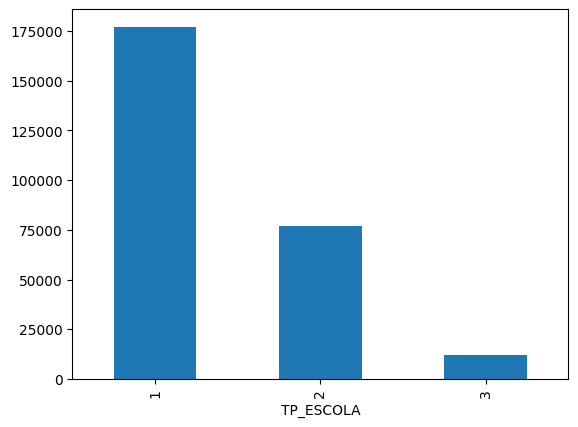

In [22]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
#1 -> Não respondeu
#2 -> pública
#3 -> particular